In [22]:
import pandas as pd
import urllib.request
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chisquare
from scipy import stats

In [23]:
ccrb_data = pd.read_csv('PUI CCRB Allegations Narrow.csv', encoding = "ISO-8859-1", engine='python')
pd.to_datetime(ccrb_data['Incident Date'])
ccrb_data = ccrb_data[ccrb_data['Incident Date'] >= '2010-01-01']
print('Number of entries:',ccrb_data.shape[0])
print('')
ccrb_data.head()

Number of entries: 44488



,Unnamed: 0,Unique Id,First Name,Last Name,Rank,Command,Complaint Id,Incident Date,precinct,allegation_num,...,Penalty_Force,Penalty_Offensive Language,substantiated_Abuse of Authority,substantiated_Force,substantiated_Discourtesy,substantiated_Offensive Language,nonsub_Force,nonsub_Abuse_of_Authority,nonsub_Discourtesy,nonsub_Offensive_Language
49503,49504,64402,Xue,Gao,SGT,PROPCLK,201000008,2010-01-03,NaN,1,...,NaN,NaN,0,0,0,0,0,1,0,0
49504,49505,35391,Franklin,Rivera,POM,CO TR,201000009,2010-01-14,NaN,1,...,NaN,NaN,0,0,0,0,1,0,0,0
49505,49506,46186,Michael,Villa,POM,HWY 03,201000009,2010-01-14,NaN,5,...,NaN,NaN,0,0,0,0,1,2,2,0
49506,49507,20374,William,Glynn,CPT,081 PCT,201000010,2010-01-01,081,1,...,NaN,NaN,0,0,0,0,0,0,1,0
49507,49508,71658,Michael,Delvalle,POM,S O D,201000010,2010-01-01,NaN,3,...,NaN,NaN,0,0,0,0,0,3,0,0


In [24]:
sub_force = ccrb_data['substantiated_Force'].sum()
unsub_force = ccrb_data['nonsub_Force'].sum()
force = sub_force + unsub_force

sub_abuse = ccrb_data['substantiated_Abuse of Authority'].sum()
unsub_abuse = ccrb_data['nonsub_Abuse_of_Authority'].sum()
abuse = sub_abuse + unsub_abuse

sub_discourt = ccrb_data['substantiated_Discourtesy'].sum()
unsub_discourt = ccrb_data['nonsub_Discourtesy'].sum()
discourt = sub_discourt + unsub_discourt

sub_offLang = ccrb_data['substantiated_Offensive Language'].sum()
unsub_offLang = ccrb_data['nonsub_Offensive_Language'].sum()
offensive_lang = sub_offLang + unsub_offLang

In [86]:
sub_rateF = (sub_force/force)*1000
sub_rateA = (sub_abuse/abuse)*1000
sub_rateD = (sub_discourt/discourt)*1000
sub_rateO = (sub_offLang/offensive_lang)*1000
print(sub_rateF, sub_rateA, sub_rateD, sub_rateO)

28.78306878306878 117.94285714285714 62.84488044144697 41.70040485829959


In [87]:
data_rate = [sub_rateF, sub_rateA, sub_rateD, sub_rateO]
df_rate = pd.DataFrame(data_rate, index=['Force', 'Abuse of Authority', 'Discourtesy', 
                              'Offensive Language'], columns=['Substantiation per 1000 Cases'])
df_rate.head()

,Substantiation per 1000 Cases
Force,28.783069
Abuse of Authority,117.942857
Discourtesy,62.844880
Offensive Language,41.700405


In [88]:
data_nums = [[sub_force, unsub_force] , [sub_abuse, unsub_abuse], [sub_discourt, unsub_discourt], 
             [sub_offLang, unsub_offLang]]
df_nums = pd.DataFrame(data_nums, index=['Force', 'Abuse of Authority', 'Discourtesy', 
                              'Offensive Language'], columns=['Substantiated Cases','Unsubstantiated Cases'])
df_nums.head()

,Substantiated Cases,Unsubstantiated Cases
Force,680,22945
Abuse of Authority,5160,38590
Discourtesy,820,12228
Offensive Language,103,2367


In [95]:
chi_f = ['-',chisquare([sub_force,unsub_force],[sub_abuse, unsub_abuse]),chisquare([sub_force, unsub_force],[sub_discourt, unsub_discourt]),chisquare([sub_force,unsub_force],[sub_offLang,unsub_offLang])]
chi_a = [chisquare([sub_abuse, unsub_abuse],[sub_force,unsub_force]),'-',chisquare([sub_abuse,unsub_abuse],[sub_discourt, unsub_discourt]),chisquare([sub_abuse, unsub_abuse],[sub_offLang,unsub_offLang])]
chi_d = [chisquare([sub_discourt, unsub_discourt],[sub_force,unsub_force]),chisquare([sub_discourt,unsub_discourt],[sub_abuse,unsub_abuse]),'-',chisquare([sub_discourt, unsub_discourt],[sub_offLang,unsub_offLang])]
chi_o = [chisquare([sub_offLang, unsub_offLang],[sub_force,unsub_force]),chisquare([sub_offLang, unsub_offLang],[sub_abuse,unsub_abuse]),chisquare([sub_offLang,unsub_offLang],[sub_discourt,unsub_discourt]),'-']

In [96]:
data_chi = [chi_f, chi_a, chi_d, chi_o]
df_chi = pd.DataFrame(data_chi, index=['Force', 'Abuse of Authority', 'Discourtesy', 'Offensive Language'], columns=['Force', 'Abuse of Authority', 'Discourtesy', 'Offensive Language'])
print('Chi-Square Test Results Between Violation Categories - Critical Value: 3.841, Sig. Level = 0.05')
df_chi.head()

Chi-Square Test Results Between Violation Categories - Critical Value: 3.841, Sig. Level = 0.05


,Force,Abuse of Authority,Discourtesy,Offensive Language
Force,-,"(10232.344328470042, 0.0)","(9416.614984003128, 0.0)","(182131.38418218135, 0.0)"
Abuse of Authority,"(40182.80446848602, 0.0)",-,"(79803.33549550411, 0.0)","(802616.7672404953, 0.0)"
Discourtesy,"(5034.449548152231, 0.0)","(21658.992223152964, 0.0)",-,"(46072.406290376166, 0.0)"
Offensive Language,"(18944.780550997908, 0.0)","(38957.241003864925, 0.0)","(8579.123035496303, 0.0)",-


In [ ]:
chi_f2 = ['-',chisquare([sub_rateF, sub_rateA]),chisquare([sub_rateF, sub_rateD]),chisquare([sub_rateF, sub_rateO])]

chi_a2 = [chisquare([sub_rateA, sub_rateF]),'-',chisquare([sub_rateA, sub_rateD]),chisquare([sub_rateA, sub_rateO])]

chi_d2 = [chisquare([sub_rateD, sub_rateF]),chisquare([sub_rateD, sub_rateA]),'-',chisquare([sub_rateD, sub_rateO])]

chi_o2 = [chisquare([sub_rateO, sub_rateF]),chisquare([sub_rateO, sub_rateA]),chisquare([sub_rateO, sub_rateD]),'-']

In [ ]:
data_chi2 = [chi_f, chi_a, chi_d, chi_o]
df_chi2 = pd.DataFrame(data_chi2, index=['Force', 'Abuse of Authority', 'Discourtesy', 
                              'Offensive Language'], columns=['Force', 'Abuse of Authority', 'Discourtesy', 
                              'Offensive Language'])
print('Chi-Square Test Results Between Violation Categories - Critical Value: 3.841, Sig. Level = 0.05')
df_chi2.head()

In [7]:
pd.set_option('mode.chained_assignment', None)

In [8]:
f_sub = ccrb_data[ccrb_data['substantiated_Force'] > 0]
f_sub['Penalty/Substantiated Case'] = f_sub['Penalty_Force']/f_sub['substantiated_Force']
f_meanPenalty = f_sub['Penalty/Substantiated Case'].mean()
f_sub['Penalty/Substantiated Case'].describe()

count    256.000000
mean       2.066406
std        0.982935
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Penalty/Substantiated Case, dtype: float64

In [9]:
a_sub = ccrb_data[ccrb_data['substantiated_Abuse of Authority'] > 0]
a_sub['Penalty/Substantiated Case'] = a_sub['Penalty_Abuse of Authority']/a_sub['substantiated_Abuse of Authority']
a_meanPenalty = a_sub['Penalty/Substantiated Case'].mean()
a_sub['Penalty/Substantiated Case'].describe()

count    2258.000000
mean        1.543334
std         0.777515
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: Penalty/Substantiated Case, dtype: float64

In [10]:
d_sub = ccrb_data[ccrb_data['substantiated_Discourtesy'] > 0]
d_sub['Penalty/Substantiated Case'] = d_sub['Penalty_Discourtesy']/d_sub['substantiated_Discourtesy']
d_meanPenalty = d_sub['Penalty/Substantiated Case'].mean()
d_sub['Penalty/Substantiated Case'].describe()

count    517.000000
mean       1.737911
std        0.901374
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: Penalty/Substantiated Case, dtype: float64

In [11]:
o_sub = ccrb_data[ccrb_data['substantiated_Offensive Language'] > 0]
o_sub['Penalty/Substantiated Case'] = o_sub['Penalty_Offensive Language']/o_sub['substantiated_Offensive Language']
o_meanPenalty = o_sub['Penalty/Substantiated Case'].mean()
o_sub['Penalty/Substantiated Case'].describe()

count    57.000000
mean      1.754386
std       1.073724
min       0.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: Penalty/Substantiated Case, dtype: float64

In [12]:
data_meanPenalty = [f_meanPenalty, a_meanPenalty, d_meanPenalty, o_meanPenalty]
df_meanPenalty = pd.DataFrame(data_meanPenalty, index=['Force', 'Abuse of Authority', 'Discourtesy', 
                              'Offensive Language'], columns=['Mean Penalty / Substantiated Case'])
df_meanPenalty.head()

,Mean Penalty / Substantiated Case
Force,2.066406
Abuse of Authority,1.543334
Discourtesy,1.737911
Offensive Language,1.754386


comparing distributions of penalties between FADO (T-Test)

In [57]:
f_a = stats.ks_2samp(f_sub['Penalty/Substantiated Case'], a_sub['Penalty/Substantiated Case'])
f_d = stats.ks_2samp(f_sub['Penalty/Substantiated Case'], d_sub['Penalty/Substantiated Case'])
f_o = stats.ks_2samp(f_sub['Penalty/Substantiated Case'], o_sub['Penalty/Substantiated Case'])

a_f = stats.ks_2samp(a_sub['Penalty/Substantiated Case'], f_sub['Penalty/Substantiated Case'])
a_d = stats.ks_2samp(a_sub['Penalty/Substantiated Case'], d_sub['Penalty/Substantiated Case'])
a_o = stats.ks_2samp(a_sub['Penalty/Substantiated Case'], o_sub['Penalty/Substantiated Case'])

d_f = stats.ks_2samp(d_sub['Penalty/Substantiated Case'], f_sub['Penalty/Substantiated Case'])
d_a = stats.ks_2samp(d_sub['Penalty/Substantiated Case'], a_sub['Penalty/Substantiated Case'])
d_o = stats.ks_2samp(d_sub['Penalty/Substantiated Case'], o_sub['Penalty/Substantiated Case'])

o_f = stats.ks_2samp(o_sub['Penalty/Substantiated Case'], f_sub['Penalty/Substantiated Case'])
o_a = stats.ks_2samp(o_sub['Penalty/Substantiated Case'], a_sub['Penalty/Substantiated Case'])
o_d = stats.ks_2samp(o_sub['Penalty/Substantiated Case'], d_sub['Penalty/Substantiated Case'])

f_f = '-'
a_a = '-'
d_d = '-'
o_o = '-'

In [58]:
data_ks = [[f_f, f_a, f_d, f_o] , [a_f, a_a, a_d, a_o], [d_f, d_a, d_d, d_o], [o_f, o_a, o_d, o_o]]
df_ks = pd.DataFrame(data_ks, index=['Force', 'Abuse of Authority', 'Discourtesy', 
                              'Offensive Language'], columns=['Force', 'Abuse of Authority', 'Discourtesy', 
                              'Offensive Language'])
print('P-Values of K-S Two Sample Tests')
df_ks.head()

P-Values of K-S Two Sample Tests


,Force,Abuse of Authority,Discourtesy,Offensive Language
Force,-,"(0.27522500201917893, 5.396480030647428e-31)","(0.27692153119662416, 3.5593785959673684e-21)","(0.19322684750194044, 0.005037418895472601)"
Abuse of Authority,"(0.27522500201917893, 5.396480030647428e-31)",-,"(0.08061370236942755, 0.0006912375818223238)","(0.14273131448703968, 0.048701274842030795)"
Discourtesy,"(0.27692153119662416, 3.5593785959673684e-21)","(0.08061370236942755, 0.0006912375818223238)",-,"(0.08369468369468369, 0.5888490779678441)"
Offensive Language,"(0.19322684750194044, 0.005037418895472601)","(0.14273131448703968, 0.048701274842030795)","(0.08369468369468369, 0.5888490779678441)",-


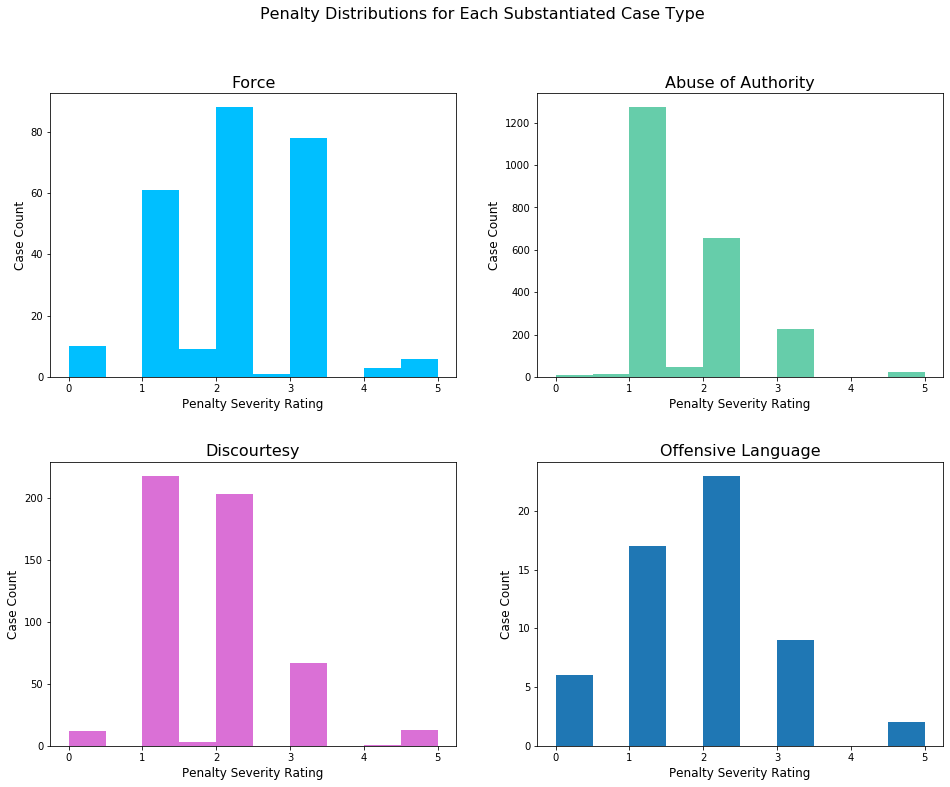

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,12))

ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]

ax1.hist(f_sub['Penalty/Substantiated Case'], color='deepskyblue')
ax1.set_ylabel('Case Count',fontsize=12)
ax1.set_xlabel('Penalty Severity Rating',fontsize=12)
ax1.set_title('Force',fontsize=16)

ax2.hist(a_sub['Penalty/Substantiated Case'], color='mediumaquamarine')
ax2.set_ylabel('Case Count',fontsize=12)
ax2.set_xlabel('Penalty Severity Rating',fontsize=12)
ax2.set_title('Abuse of Authority',fontsize=16)

ax3.hist(d_sub['Penalty/Substantiated Case'], color='orchid')
ax3.set_ylabel('Case Count',fontsize=12)
ax3.set_xlabel('Penalty Severity Rating',fontsize=12)
ax3.set_title('Discourtesy',fontsize=16)

ax4.hist(o_sub['Penalty/Substantiated Case'])
ax4.set_ylabel('Case Count',fontsize=12)
ax4.set_xlabel('Penalty Severity Rating',fontsize=12)
ax4.set_title('Offensive Language',fontsize=16)

fig.subplots_adjust(hspace = 0.3)
fig.suptitle('Penalty Distributions for Each Substantiated Case Type', fontsize=16)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,24))

ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]
ax5 = axes[2][0]
ax6 = axes[2][1]
ax7 = axes[3][0]
ax8 = axes[3][1]

taxi0Viz.plot(ax=ax1, column='vehicle_count', cmap='RdBu_r', legend=True)
taxi1Viz.plot(ax=ax2, column='vehicle_count', cmap='RdBu_r', legend=True)
taxi2Viz.plot(ax=ax3, column='vehicle_count', cmap='RdBu_r', legend=True)
taxi3Viz.plot(ax=ax4, column='vehicle_count', cmap='RdBu_r', legend=True)
taxi4Viz.plot(ax=ax5, column='vehicle_count', cmap='RdBu_r', legend=True)
taxi5Viz.plot(ax=ax6, column='vehicle_count', cmap='RdBu_r', legend=True)
taxi6Viz.plot(ax=ax7, column='vehicle_count', cmap='RdBu_r', legend=True)

fig.suptitle('Spacial Distribution of Drop-off Locations by Day of Week', fontsize=16)
plt.show()

In [ ]:
taxi0Viz.plot(figsize=(10,10), column='vehicle_count', cmap='RdBu_r', legend=True)
taxi1Viz.plot(figsize=(10,10), column='vehicle_count', cmap='RdBu_r', legend=True)
taxi2Viz.plot(figsize=(10,10), column='vehicle_count', cmap='RdBu_r', legend=True)
taxi3Viz.plot(figsize=(10,10), column='vehicle_count', cmap='RdBu_r', legend=True)
taxi4Viz.plot(figsize=(10,10), column='vehicle_count', cmap='RdBu_r', legend=True)
taxi5Viz.plot(figsize=(10,10), column='vehicle_count', cmap='RdBu_r', legend=True)
taxi6Viz.plot(figsize=(10,10), column='vehicle_count', cmap='RdBu_r', legend=True)